In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


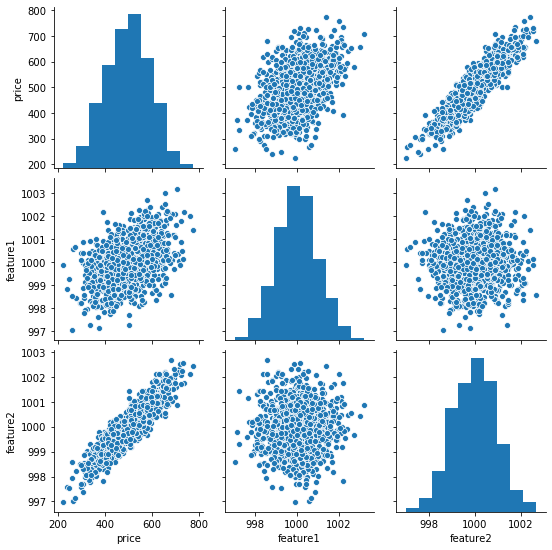

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values  # input training data

In [7]:
y = df['price'].values  # target 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)  # splitting the data in training and test

In [9]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [10]:
y_train.shape, y_test.shape

((700,), (300,))

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
Scaler = MinMaxScaler()

In [13]:
Scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = Scaler.transform(X_train)

In [15]:
X_test = Scaler.transform(X_test)

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
print('tensorflow __version__: ', tf.__version__)

tensorflow __version__:  2.3.0


In [17]:
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])

In [18]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [19]:
# model.fit(x=X_train, y=y_train, epochs=100, verbose=10)

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [20]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256701.1250
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256637.1719
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256573.3750
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256495.5938
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256397.1875
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256281.5469
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256147.5625
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255994.6562
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255822.8281
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255631.4062
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255418.6562
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [21]:
model.history.history

{'loss': [256701.125,
  256637.171875,
  256573.375,
  256495.59375,
  256397.1875,
  256281.546875,
  256147.5625,
  255994.65625,
  255822.828125,
  255631.40625,
  255418.65625,
  255184.578125,
  254925.984375,
  254645.125,
  254338.40625,
  254005.71875,
  253646.171875,
  253257.84375,
  252842.3125,
  252393.578125,
  251909.171875,
  251380.1875,
  250798.953125,
  250165.21875,
  249473.765625,
  248722.234375,
  247911.609375,
  247027.5,
  246078.65625,
  245058.03125,
  243958.578125,
  242786.625,
  241528.890625,
  240180.09375,
  238753.921875,
  237225.484375,
  235599.765625,
  233871.9375,
  232045.25,
  230109.1875,
  228066.703125,
  225909.765625,
  223630.65625,
  221241.9375,
  218726.15625,
  216098.171875,
  213331.90625,
  210429.6875,
  207397.875,
  204253.828125,
  200972.59375,
  197549.078125,
  193980.28125,
  190267.9375,
  186418.96875,
  182442.9375,
  178315.71875,
  174079.25,
  169677.6875,
  165175.46875,
  160529.46875,
  155747.890625,
  150847

In [22]:
loss = model.history.history['loss']

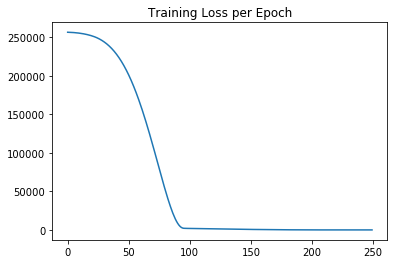

In [23]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [24]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [25]:
training_score, test_score

(24.040346145629883, 24.974870681762695)

In [26]:
test_predictions = model.predict(X_test)

In [27]:
test_predictions

array([[405.1173 ],
       [623.25073],
       [591.8376 ],
       [572.0151 ],
       [366.56116],
       [578.9285 ],
       [514.91534],
       [458.8688 ],
       [549.04456],
       [447.27957],
       [611.50085],
       [548.6013 ],
       [418.92752],
       [408.71805],
       [650.838  ],
       [437.0828 ],
       [508.14532],
       [659.7058 ],
       [662.30927],
       [565.2414 ],
       [334.14273],
       [444.64645],
       [382.40274],
       [378.59256],
       [566.3437 ],
       [610.36096],
       [532.1651 ],
       [427.66693],
       [655.19574],
       [413.86688],
       [442.407  ],
       [484.9128 ],
       [438.21732],
       [681.5724 ],
       [424.51242],
       [417.54816],
       [501.60092],
       [550.2179 ],
       [509.5799 ],
       [395.2818 ],
       [618.28424],
       [416.42212],
       [604.1535 ],
       [445.698  ],
       [501.7673 ],
       [581.34503],
       [668.61115],
       [490.14792],
       [318.40945],
       [485.2217 ],


In [28]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [29]:
pred_df.head()

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [30]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [31]:
test_predictions

0      405.117310
1      623.250732
2      591.837585
3      572.015076
4      366.561157
          ...    
295    528.849548
296    515.257629
297    609.359253
298    416.731110
299    410.737274
Length: 300, dtype: float32

In [32]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [33]:
pred_df.head()

,Test Y,0
0,402.296319,405.117310
1,624.156198,623.250732
2,582.455066,591.837585
3,578.588606,572.015076
4,371.224104,366.561157


In [34]:
pred_df.columns = ['Test Y','Model Predictions']

In [35]:
pred_df.head()

,Test Y,Model Predictions
0,402.296319,405.117310
1,624.156198,623.250732
2,582.455066,591.837585
3,578.588606,572.015076
4,371.224104,366.561157


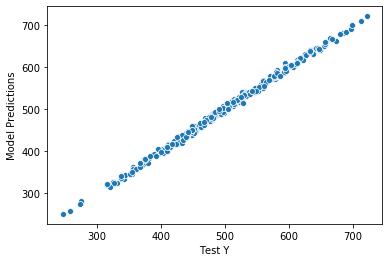

In [36]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [37]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

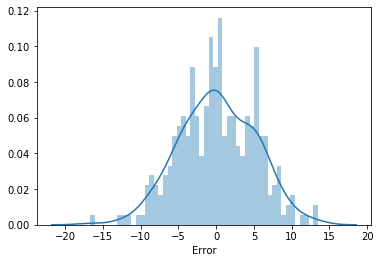

In [38]:
sns.distplot(pred_df['Error'],bins=50)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.002156412283694

In [41]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

24.974888830737278

In [42]:
# Essentially the same thing, difference just due to precision
test_score

24.974870681762695

In [43]:
#RMSE
test_score**0.5

4.99748643637606

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [44]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [47]:
# Don't forget to scale!
Scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [49]:
new_gem = Scaler.transform(new_gem)

In [50]:
model.predict(new_gem)

array([[419.5961]], dtype=float32)

## Saving and Loading a Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [53]:
later_model = load_model('my_model.h5')

In [54]:
later_model.predict(new_gem)

array([[419.5961]], dtype=float32)